## Informasi Mahasiswa

Nama: Ivan Chiari

NPM : 2108107010027

## Jenis Dataset


## Import Libary dan Baca dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_df = pd.read_csv("dataset/USA_housing.csv")
house_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Preprocessing Data

In [3]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
house_df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
house_df.duplicated().sum()

0

In [7]:
house_df.drop('Address', axis=1, inplace=True)

In [8]:
house_df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


<Axes: >

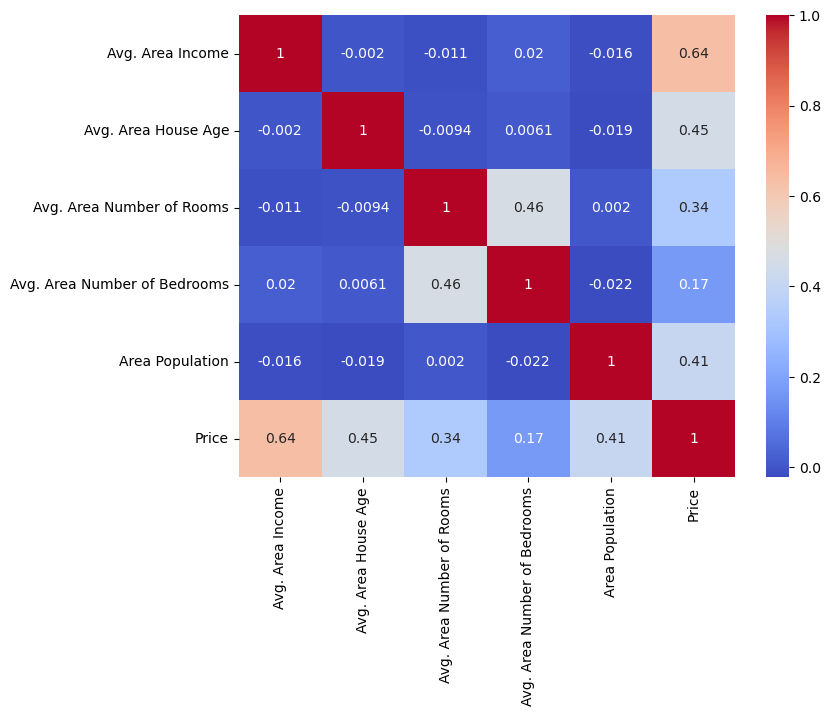

In [9]:
df_cor =house_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_cor, annot=True, cmap='coolwarm')

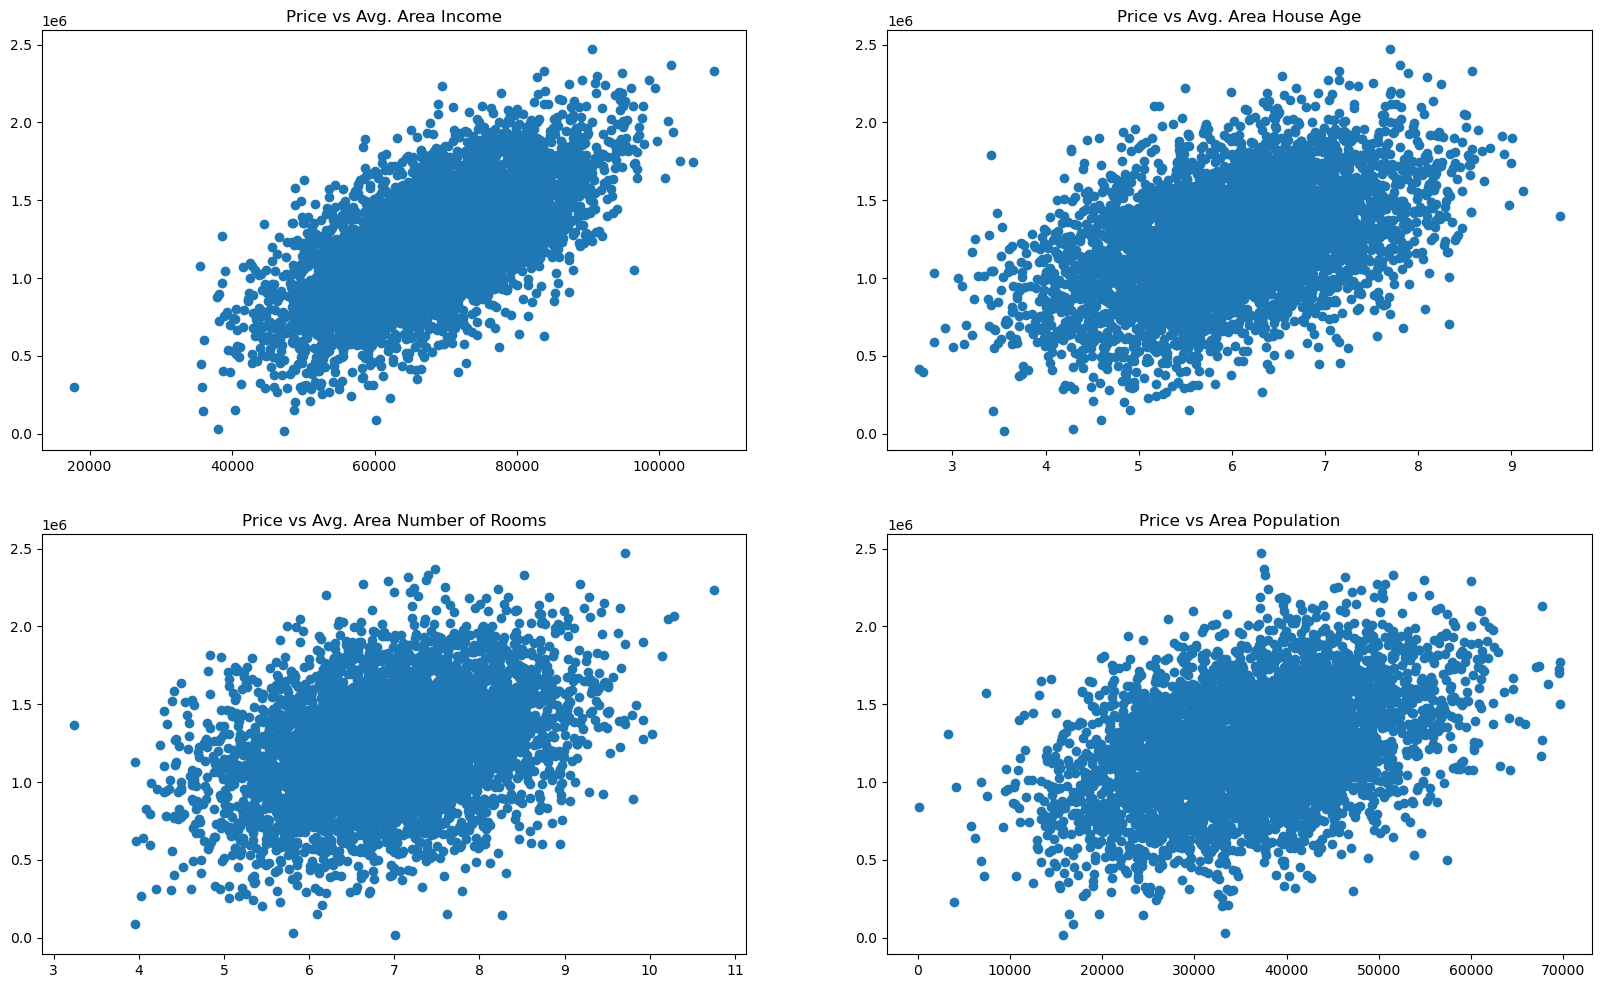

In [10]:
# plot price vs other features
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.scatter(house_df['Avg. Area Income'], house_df['Price'])
plt.title('Price vs Avg. Area Income')
plt.subplot(2, 2, 2)
plt.scatter(house_df['Avg. Area House Age'], house_df['Price'])
plt.title('Price vs Avg. Area House Age')
plt.subplot(2, 2, 3)
plt.scatter(house_df['Avg. Area Number of Rooms'], house_df['Price'])
plt.title('Price vs Avg. Area Number of Rooms')
plt.subplot(2, 2, 4)
plt.scatter(house_df['Area Population'], house_df['Price'])
plt.title('Price vs Area Population')
plt.show()

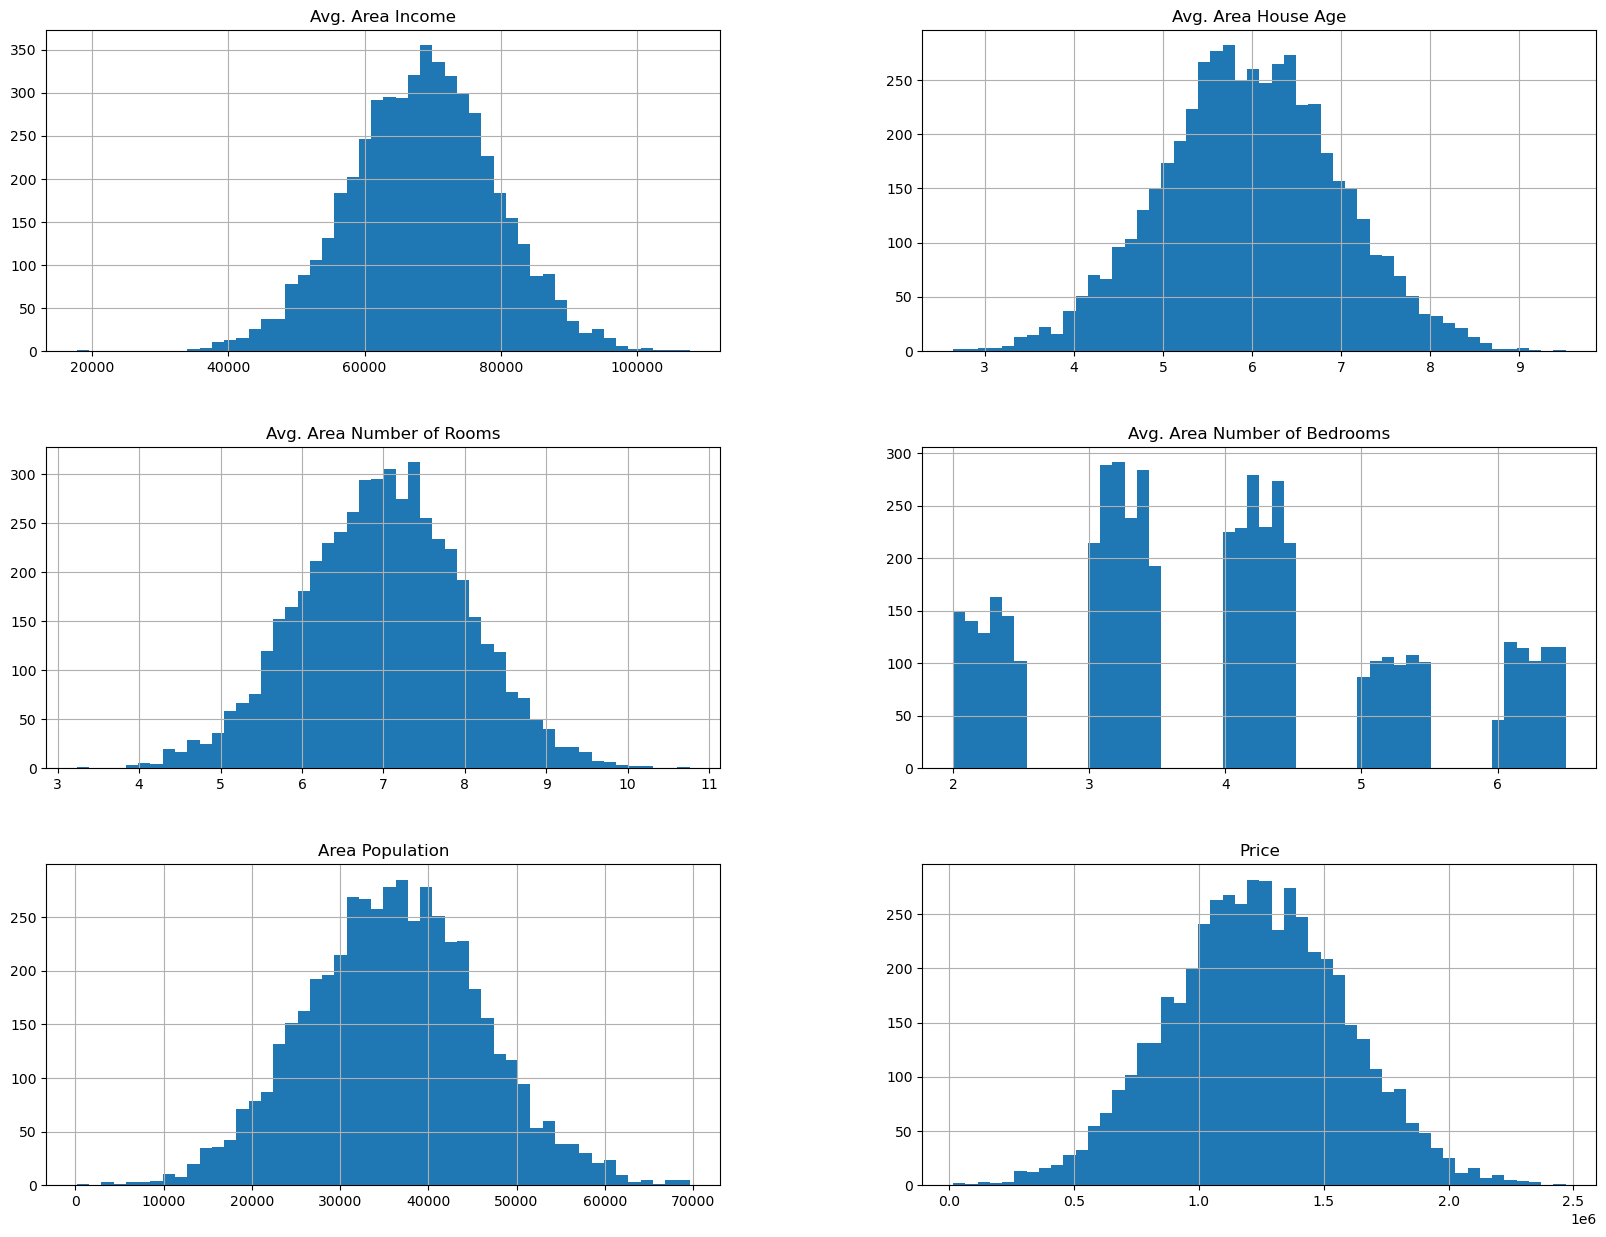

In [11]:
# plot data distribution of all features
house_df.hist(bins=50, figsize=(20, 15))
plt.show()

## Split dataset dan normalisasi data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = house_df.drop('Price', axis=1)
y = house_df['Price']

x_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [13]:
from sklearn import metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    

## Membangun Model 

In [23]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon= 0.01, gamma= 0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)



Test set evaluation:
_____________________________________
MAE: 81191.42694869696
MSE: 10073413490.060297
RMSE: 100366.3962193537
R2 Square 0.9146395574853442
__________________________________


## Visualisasi Model 

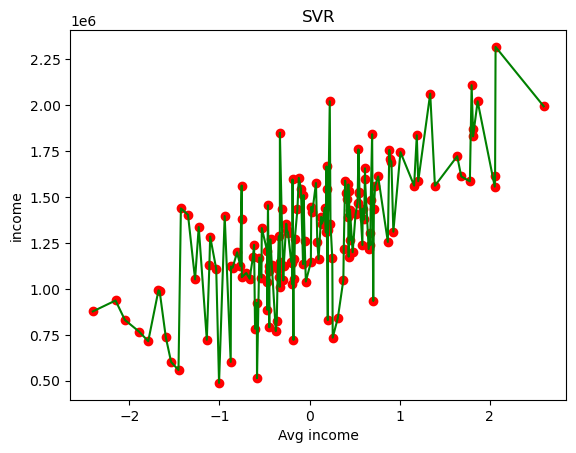

In [34]:
import random

# Define the number of points you want to plot
num_points_to_plot = 150  # Change this number as per your preference

# Randomly select num_points_to_plot indices from X_test
random_indices = random.sample(range(len(X_test)), num_points_to_plot)

# Sort the randomly selected indices based on the 'age' variable
sorted_indices = np.argsort(X_test[random_indices, 0])
sorted_income = X_test[random_indices, 0][sorted_indices]
sorted_pred = test_pred[random_indices][sorted_indices]

# Plot the scatter plot of actual vs. predicted charges
plt.scatter(sorted_income, sorted_pred, color='red', label='Predicted')

# Plot the SVR prediction line after sorting the data
plt.plot(sorted_income, svm_reg.predict(X_test[random_indices][sorted_indices]), color='green')

plt.title('SVR')
plt.xlabel('Avg income')
plt.ylabel('income')
plt.show()


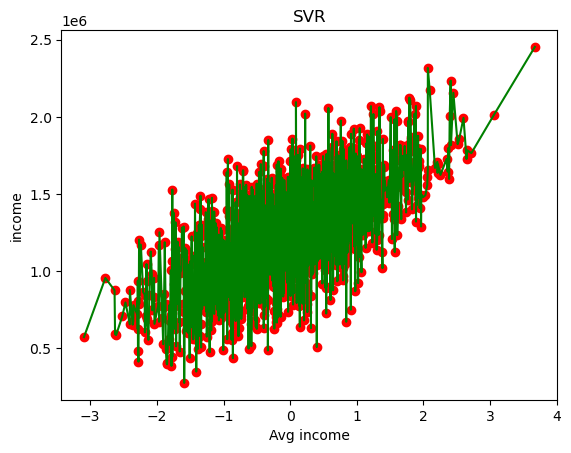

In [25]:
# Sort the data points based on the 'age' variable
sorted_indices = np.argsort(X_test[:,0])
sorted_income = X_test[:,0][sorted_indices]
sorted_pred = test_pred[sorted_indices]

# Plot the scatter plot of actual vs. predicted charges
plt.scatter(X_test[:,0], test_pred, color='red', label='Predicted')

# Plot the SVR prediction line after sorting the data
plt.plot(sorted_income, svm_reg.predict(X_test[sorted_indices]), color='green')

plt.title('SVR')
plt.xlabel('Avg income')
plt.ylabel('income')
plt.show()